In [1]:
import json
import matplotlib.pyplot as plt

from pathlib import Path
from datetime import datetime


In [2]:
destination = Path('sd_card')

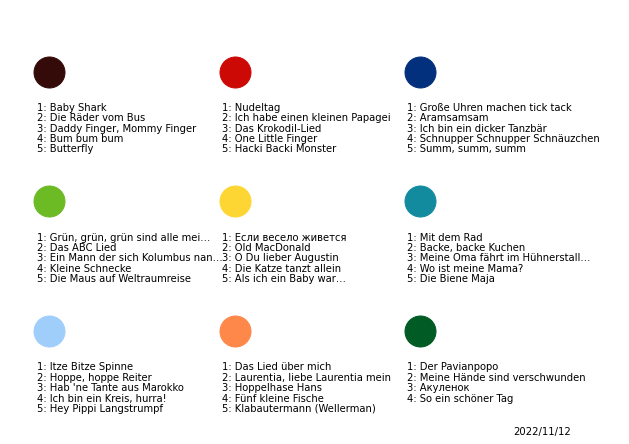

In [3]:
with open('hoerbert.json', 'r', encoding='utf-8') as f:
    hoerbert = json.load(f)

colors = ['340B08', 'CC0904', '03307C', 
          '6CBA24', 'FED633', '128B9F',
          'A0CEFB', 'FE884A', '005B25']
coords = [(0, 2), (2.2, 2), (4.4, 2),
          (0, 1), (2.2, 1), (4.4, 1),
          (0, 0), (2.2, 0), (4.4, 0),]
cm = 1/2.54
fig, ax = plt.subplots(figsize=(28*cm,20*cm));

for idb, button in enumerate(hoerbert):
        ax.plot(coords[idb][0],
                coords[idb][1],
                marker='o',
                markersize=31,
                color='#' + colors[idb])
        for ids, song in enumerate(hoerbert[button]):
            if len(song['Name']) > 31:
                short_name = song['Name'][:30] + '…'
            elif len(song['Name']) > 30:
                short_name = song['Name'][:31]
            else:
                short_name = song['Name']
            song_name = '%d: %s' %(ids+1, short_name)
            ax.text(coords[idb][0]-0.15,
                    coords[idb][1] - ids*0.08 -0.3,
                    song_name,
                    fontsize=10)

ax.text(5.5,
        -0.8,
       datetime.now().strftime('%Y/%m/%d'))
ax.set_xlim(-0.5, 6.8);
ax.set_ylim(-0.8, 2.5);
ax.axis('off')

fig.savefig(destination / 'index.jpg', dpi=300)